In [1]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 153s 1us/step


In [4]:
print('Training images; {}'.format(X_train.shape))

Training images; (50000, 32, 32, 3)


In [6]:
X_train = X_train.reshape(X_train.shape[0],32,32,3)
X_test= X_test.reshape(X_test.shape[0],32,32,3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


X_train= X_train/255
X_test =  X_test/255
n_classes= 10


print("Shape before one-hot encoding:", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test =  np_utils.to_categorical(y_test, n_classes)
print("Shapeafter one-hot encoding:", Y_train.shape)

Shape before one-hot encoding: (50000, 1)
Shapeafter one-hot encoding: (50000, 10)


In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout , Conv2D, MaxPool2D, Flatten

In [14]:
model = Sequential()
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32,32,3)))

model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

In [15]:
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))

In [16]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [17]:
model.fit(X_train,Y_train, batch_size=128, epochs=20, validation_data=(X_test,Y_test))

Epoch 1/20
391/391 [==============================] - 233s 594ms/step - loss: 2.3030 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/20
391/391 [==============================] - 245s 626ms/step - loss: 2.3027 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/20
391/391 [==============================] - 208s 532ms/step - loss: 2.3027 - accuracy: 0.0970 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/20
391/391 [==============================] - 205s 525ms/step - loss: 2.3027 - accuracy: 0.0984 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/20
391/391 [==============================] - 204s 522ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/20
391/391 [==============================] - 207s 530ms/step - loss: 2.3027 - accuracy: 0.0981 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/20
391/391 [==============================] - 205s 524ms/step - loss: 2.3027 - accuracy: 0.0988 - val_loss: 2.3026 -

In [21]:
classes = range(0,10)

names =['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse','ship', 'truck']

class_labels = dict(zip(classes, names))

batch = X_test[100:109]
labels = np.argmax(Y_test[100:109], axis=-1)

prediction = model.predict(batch, verbose= 1)

print(prediction)

class_result = np.argmax(prediction, axis = -1)
print(class_result)


1/1 [==============================] - 0s 25ms/step
[[0.09982232 0.10078394 0.0999964  0.10029573 0.10047389 0.09909279
  0.10000847 0.1004641  0.10005557 0.09900681]
 [0.09982232 0.10078394 0.0999964  0.10029573 0.10047389 0.09909279
  0.10000847 0.1004641  0.10005557 0.09900681]
 [0.09982232 0.10078394 0.0999964  0.10029573 0.10047389 0.09909279
  0.10000847 0.1004641  0.10005557 0.09900681]
 [0.09982232 0.10078394 0.0999964  0.10029573 0.10047389 0.09909279
  0.10000847 0.1004641  0.10005557 0.09900681]
 [0.09982232 0.10078394 0.0999964  0.10029573 0.10047389 0.09909279
  0.10000847 0.1004641  0.10005557 0.09900681]
 [0.09982232 0.10078394 0.0999964  0.10029573 0.10047389 0.09909279
  0.10000847 0.1004641  0.10005557 0.09900681]
 [0.09982232 0.10078394 0.0999964  0.10029573 0.10047389 0.09909279
  0.10000847 0.1004641  0.10005557 0.09900681]
 [0.09982232 0.10078394 0.0999964  0.10029573 0.10047389 0.09909279
  0.10000847 0.1004641  0.10005557 0.09900681]
 [0.09982232 0.10078394 0.09

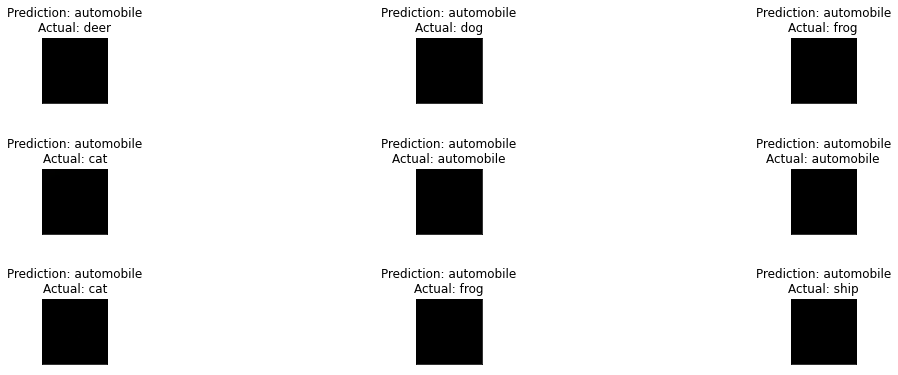

In [29]:
fig, axs = plt.subplots(3,3,figsize=(19,6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):
    for key, value in class_labels.items():
         if class_result[i] == key:
                 title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
                 axs[i].set_title(title)
                 axs[i].axes.get_xaxis().set_visible(False)
                 axs[i].axes.get_yaxis().set_visible(False)
    axs[i].imshow(img)
    
plt.show()

In [30]:
model.save('objectRecogniser')

INFO:tensorflow:Assets written to: objectRecogniser\assets
